## Person Detection - EDA

In [2]:
!git clone https://github.com/725ps/person-detection.git

Cloning into 'person-detection'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 31 (delta 6), reused 16 (delta 3), pack-reused 11 (from 1)
Receiving objects: 100% (31/31), 75.66 MiB | 31.09 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [3]:
!pwd


/content


In [4]:
%cd /content/person-detection

/content/person-detection


In [5]:
!ls

eda.ipynb  LICENSE    requirements.txt	train.py    yolov8n.pt	yolov8-training.ipynb
eda.py	   README.md  tracking.py	yolov8m.pt  yolov8s.pt


In [7]:
!pip install -r requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00

In [8]:
import fiftyone as fo
import fiftyone.zoo as foz
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [9]:
foz.list_zoo_datasets()

['activitynet-100',
 'activitynet-200',
 'bdd100k',
 'caltech101',
 'caltech256',
 'cifar10',
 'cifar100',
 'cityscapes',
 'coco-2014',
 'coco-2017',
 'fashion-mnist',
 'fiw',
 'hmdb51',
 'imagenet-2012',
 'imagenet-sample',
 'kinetics-400',
 'kinetics-600',
 'kinetics-700',
 'kinetics-700-2020',
 'kitti',
 'kitti-multiview',
 'lfw',
 'mnist',
 'open-images-v6',
 'open-images-v7',
 'places',
 'quickstart',
 'quickstart-3d',
 'quickstart-geo',
 'quickstart-groups',
 'quickstart-video',
 'sama-coco',
 'ucf101',
 'voc-2007',
 'voc-2012']

In [10]:
datasets = foz.load_zoo_dataset('coco-2017', splits=('train', 'validation', 'test'), classes=['person'], progress=True, max_samples=10000)
datasets

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [7.2s elapsed, 0s remaining, 282.8Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [7.2s elapsed, 0s remaining, 282.8Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 10000 images


 100% |██████████████| 10000/10000 [47.6m elapsed, 0s remaining, 3.8 images/s]      


INFO:eta.core.utils: 100% |██████████████| 10000/10000 [47.6m elapsed, 0s remaining, 3.8 images/s]      


Writing annotations for 10000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 10000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Only found 2693 (<10000) samples matching your requirements


INFO:fiftyone.utils.coco:Downloading 2693 images


 100% |████████████████| 2693/2693 [12.8m elapsed, 0s remaining, 3.4 images/s]      


INFO:eta.core.utils: 100% |████████████████| 2693/2693 [12.8m elapsed, 0s remaining, 3.4 images/s]      


Writing annotations for 2693 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 2693 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


INFO:fiftyone.utils.coco:Downloading test info to '/root/fiftyone/coco-2017/tmp-download/image_info_test2017.zip'


 100% |██████|    8.7Mb/8.7Mb [518.1ms elapsed, 0s remaining, 16.8Mb/s]      


INFO:eta.core.utils: 100% |██████|    8.7Mb/8.7Mb [518.1ms elapsed, 0s remaining, 16.8Mb/s]      


Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Downloading 10000 images


 100% |██████████████| 10000/10000 [48.5m elapsed, 0s remaining, 3.7 images/s]      


INFO:eta.core.utils: 100% |██████████████| 10000/10000 [48.5m elapsed, 0s remaining, 3.7 images/s]      


Writing annotations for 10000 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 10000 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████| 10000/10000 [1.9m elapsed, 0s remaining, 107.5 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 10000/10000 [1.9m elapsed, 0s remaining, 107.5 samples/s]      


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 2693/2693 [32.1s elapsed, 0s remaining, 104.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2693/2693 [32.1s elapsed, 0s remaining, 104.0 samples/s]      


Loading 'coco-2017' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'test'


Dataset is unlabeled; ignoring classes requirement


 100% |█████████████| 10000/10000 [7.9s elapsed, 0s remaining, 814.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 10000/10000 [7.9s elapsed, 0s remaining, 814.1 samples/s]      


Dataset 'coco-2017-train-validation-test-10000' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-validation-test-10000' created


Name:        coco-2017-train-validation-test-10000
Media type:  image
Num samples: 22693
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

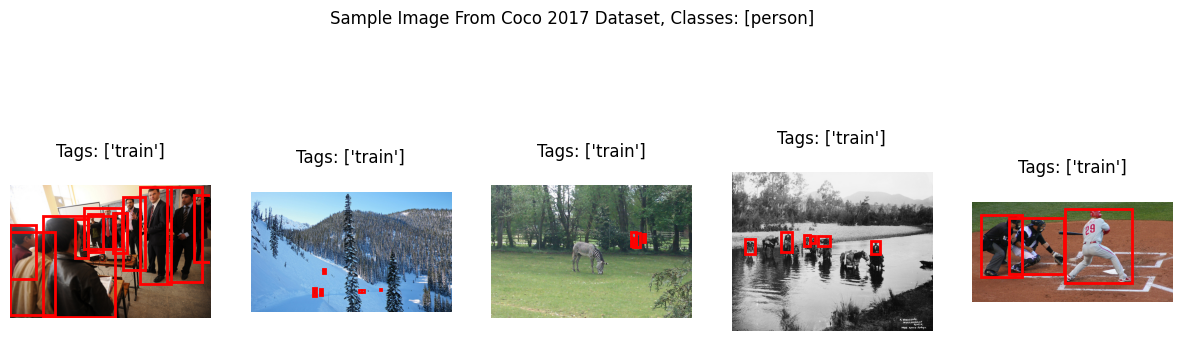

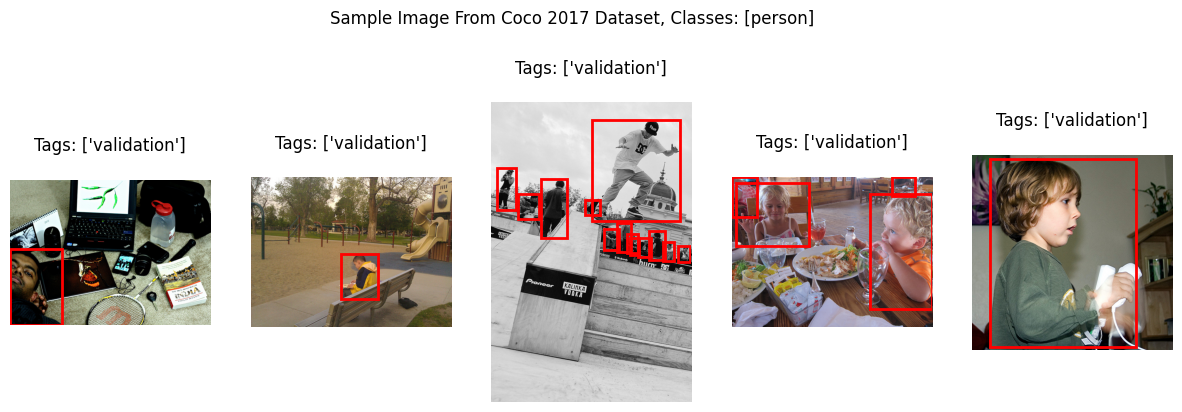

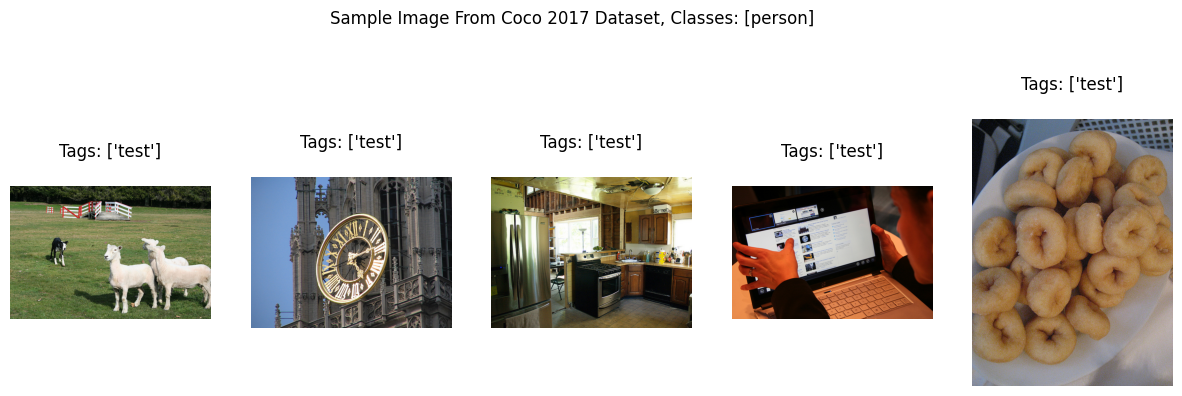

In [20]:
def show_sample(split_view):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("Sample Image From Coco 2017 Dataset, Classes: [person]")
    i = 1
    for d in split_view.take(5):
        ax = fig.add_subplot(1, 5, i)
        ax.set_title(f"Tags: {d.tags}\n")
        img = plt.imread(d.filepath)
        ax.imshow(img)
        ax.axis('off')
        i += 1

        # Skip for testing data
        if d.ground_truth is None:
            continue

        for detection in d.ground_truth.detections:
            x, y, w, h = detection.bounding_box
            image_height, image_width, _ = img.shape
            x1 = x * image_width
            y1 = y * image_height
            x2 = x1 + (w * image_width)
            y2 = y1 + (h * image_height)
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

for split in ['train', 'validation', 'test']:
    split_view = datasets.match_tags(split)
    show_sample(split_view)

In [12]:
for sample in datasets:
  if sample.ground_truth == None:
    continue

  detections = [detection for detection in sample.ground_truth.detections if detection.label == "person"]
  sample.ground_truth.detections = detections
  sample.save()

In [13]:
# Export the splits
for split in ['train', 'validation', 'test']:
    split_view = datasets.match_tags(split)
    split_view.export(
        export_dir='./yolov5-coco-datasets',
        dataset_type=fo.types.YOLOv5Dataset,
        label_field='ground_truth',
        split=split,
        classes=['person'],
    )

 100% |█████████████| 10000/10000 [1.1m elapsed, 0s remaining, 218.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 10000/10000 [1.1m elapsed, 0s remaining, 218.8 samples/s]      


Directory './yolov5-coco-datasets' already exists; export will be merged with existing files


 100% |███████████████| 2693/2693 [13.7s elapsed, 0s remaining, 206.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2693/2693 [13.7s elapsed, 0s remaining, 206.6 samples/s]      


Directory './yolov5-coco-datasets' already exists; export will be merged with existing files


 100% |█████████████| 10000/10000 [24.2s elapsed, 0s remaining, 144.7 samples/s]      


INFO:eta.core.utils: 100% |█████████████| 10000/10000 [24.2s elapsed, 0s remaining, 144.7 samples/s]      


In [14]:
!ls


eda.ipynb  LICENSE    requirements.txt	train.py	      yolov8m.pt  yolov8s.pt
eda.py	   README.md  tracking.py	yolov5-coco-datasets  yolov8n.pt  yolov8-training.ipynb


In [15]:
%cd /root/fiftyone

/root/fiftyone


In [16]:
!zip -r fiftyone.zip fiftyone


	zip warning: name not matched: fiftyone

zip error: Nothing to do! (try: zip -r fiftyone.zip . -i fiftyone)


In [17]:
!ls

coco-2017


In [18]:
!zip -r coco-2017.zip coco-2017

Streaming output truncated to the last 5000 lines.
  adding: coco-2017/test/data/000000028117.jpg (deflated 0%)
  adding: coco-2017/test/data/000000043821.jpg (deflated 0%)
  adding: coco-2017/test/data/000000052940.jpg (deflated 0%)
  adding: coco-2017/test/data/000000043938.jpg (deflated 1%)
  adding: coco-2017/test/data/000000064717.jpg (deflated 4%)
  adding: coco-2017/test/data/000000082193.jpg (deflated 0%)
  adding: coco-2017/test/data/000000071337.jpg (deflated 0%)
  adding: coco-2017/test/data/000000085309.jpg (deflated 0%)
  adding: coco-2017/test/data/000000141539.jpg (deflated 0%)
  adding: coco-2017/test/data/000000137222.jpg (deflated 0%)
  adding: coco-2017/test/data/000000002311.jpg (deflated 0%)
  adding: coco-2017/test/data/000000134464.jpg (deflated 0%)
  adding: coco-2017/test/data/000000091024.jpg (deflated 0%)
  adding: coco-2017/test/data/000000036642.jpg (deflated 1%)
  adding: coco-2017/test/data/000000094014.jpg (deflated 0%)
  adding: coco-2017/test/data/0000

In [19]:
from google.colab import files
files.download("coco-2017.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from ultralytics import YOLO
from PIL import Image
import cv2

import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [22]:
%cd /content/person-detection

/content/person-detection


In [23]:
!ls

eda.ipynb  LICENSE    requirements.txt	train.py	      yolov8m.pt  yolov8s.pt
eda.py	   README.md  tracking.py	yolov5-coco-datasets  yolov8n.pt  yolov8-training.ipynb


In [24]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [1]:
results = model.train(data='./yolov5-coco-datasets/dataset.yaml', epochs=50, imgsz=640, device=0, batch=32, plots=True, seed=18, project='./training/yolov8n')

NameError: name 'model' is not defined